In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('original_data_.csv')

In [3]:
print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns)
print("\nData types of columns:\n", df.dtypes)
print("\nSample data:\n", df.head())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Unique values in categorical columns
categorical_cols = ['platform', 'studio', 'genre']
for col in categorical_cols:
    print(f"\nUnique values in {col}:", df[col].unique())

# Correlation matrix
# correlation_matrix = df.corr()
# print("\nCorrelation matrix:\n", correlation_matrix)


Shape of the dataset: (84151, 31)

Column names: Index(['title', 'platform', 'studio', 'genre', 'PreCovid', 'Covid',
       'PostCovid', 'pitunes', 'pamazon', 'pvudu', 'pappletv', 'pgoogle',
       'swb', 'ssony', 'suni', 'spara', 'sdis', 'sfox', 'shbo', 'sother',
       'release_date', 'first_seen_est_date', 'est_delta', 'SmallBudget',
       'MediumBudget', 'LargeBudget', 'UnknownBudget', 'release_year',
       'release_month', 'release_day', 'release_weekday'],
      dtype='object')

Data types of columns:
 title                  object
platform               object
studio                 object
genre                  object
PreCovid                int64
Covid                   int64
PostCovid               int64
pitunes                 int64
pamazon                 int64
pvudu                   int64
pappletv                int64
pgoogle                 int64
swb                     int64
ssony                   int64
suni                    int64
spara                   int64
sdis

In [4]:
df.shape

(84151, 31)

          Not Available  Available
pitunes           57753      26398
pamazon           61465      22686
pvudu             71171      12980
pappletv          75267       8884
pgoogle           70948      13203


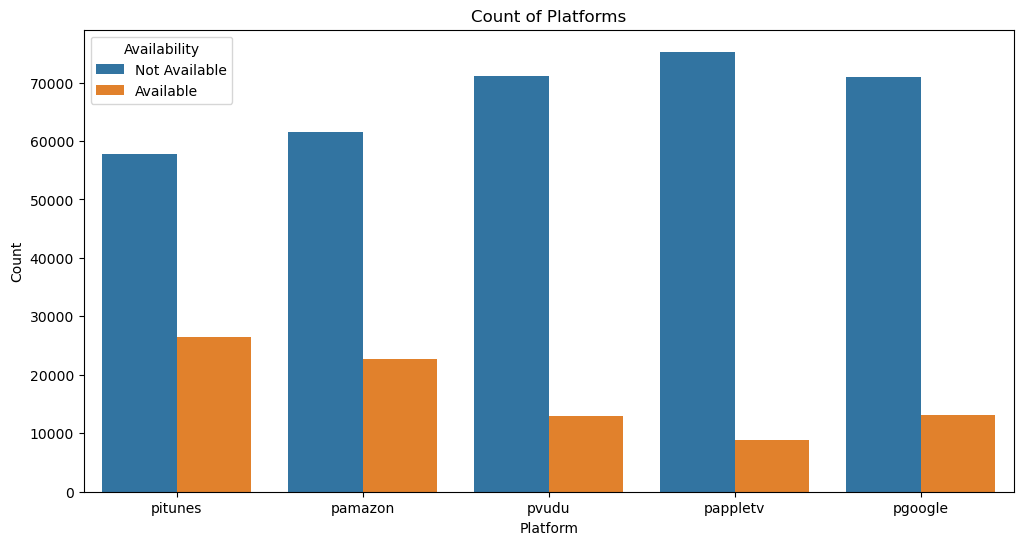

In [5]:
# Combine the columns into a single DataFrame
platform_df = df[['pitunes', 'pamazon', 'pvudu', 'pappletv', 'pgoogle']].melt(var_name='platform', value_name='count')

# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=platform_df, x='platform', hue='count')
plt.title('Count of Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Availability', labels=['Not Available', 'Available'])

# Calculate counts of 1s and 0s for each platform
platform_counts = df[['pitunes', 'pamazon', 'pvudu', 'pappletv', 'pgoogle']].apply(pd.Series.value_counts)

# Transpose the dataframe for easier viewing
platform_counts = platform_counts.transpose()

# Rename the columns
platform_counts.columns = ['Not Available', 'Available']

print(platform_counts)
plt.show()


        Not Available  Available
swb             82522       1629
ssony           80943       3208
suni            81706       2445
spara           82485       1666
sdis            83519        632
sfox            83215        936
shbo            83168        983
sother          11499      72652


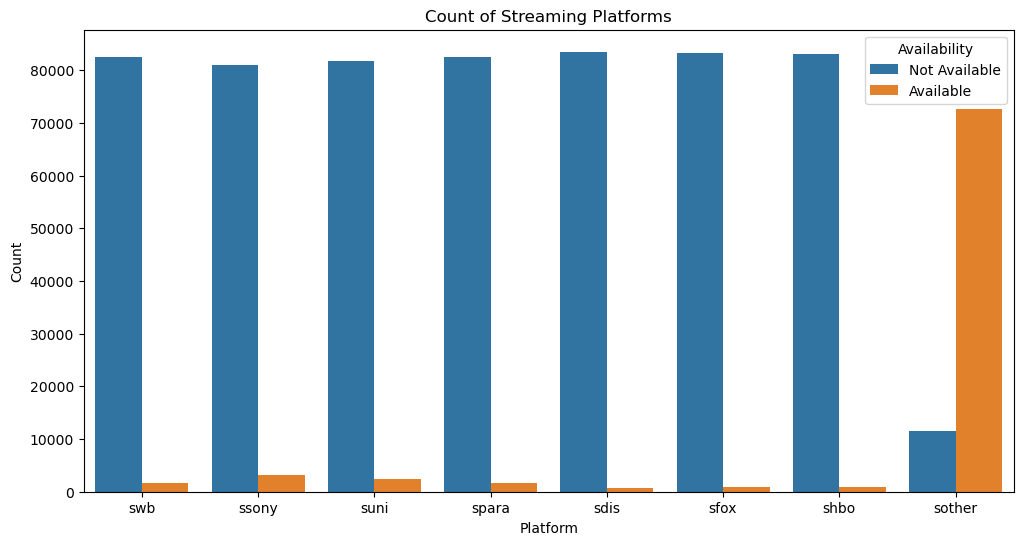

In [6]:
# Calculate counts of 1s and 0s for each streaming platform
streaming_counts = df[['swb', 'ssony', 'suni', 'spara', 'sdis', 'sfox', 'shbo', 'sother']].apply(pd.Series.value_counts)

# Transpose the dataframe for easier viewing
streaming_counts = streaming_counts.transpose()

# Rename the columns
streaming_counts.columns = ['Not Available', 'Available']

print(streaming_counts)

# Create count plots
plt.figure(figsize=(12, 6))
sns.countplot(data=df[['swb', 'ssony', 'suni', 'spara', 'sdis', 'sfox', 'shbo', 'sother']].melt(var_name='platform', value_name='count'), x='platform', hue='count')
plt.title('Count of Streaming Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Availability', labels=['Not Available', 'Available'])
plt.show()


In [7]:
unique_value_counts = df.nunique()

# Print the unique value counts for each column
print(unique_value_counts)

title                  38528
platform                   5
studio                     8
genre                   2817
PreCovid                   2
Covid                      2
PostCovid                  2
pitunes                    2
pamazon                    2
pvudu                      2
pappletv                   2
pgoogle                    2
swb                        2
ssony                      2
suni                       2
spara                      2
sdis                       2
sfox                       2
shbo                       2
sother                     2
release_date            3939
first_seen_est_date     4062
est_delta                366
SmallBudget                2
MediumBudget               2
LargeBudget                2
UnknownBudget              2
release_year              12
release_month             12
release_day               31
release_weekday            7
dtype: int64


In [8]:


# Assuming your data is stored in a DataFrame called 'df'
# If not, you can read your data into a DataFrame using pd.read_csv() or pd.read_excel()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data
df[['release_year', 'release_month', 'release_day']] = scaler.fit_transform(df[['release_year', 'release_month', 'release_day']])

# Print the updated DataFrame
df.head()


,title,platform,studio,genre,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,...,first_seen_est_date,est_delta,SmallBudget,MediumBudget,LargeBudget,UnknownBudget,release_year,release_month,release_day,release_weekday
0,Two Witches,iTunes,Other,Horror,0,1,0,1,0,0,...,2022-10-17,365,0,0,0,1,0.701150,0.995099,0.330039,Sunday
1,Heaven,iTunes,Other,Drama,0,1,0,1,0,0,...,2021-10-05,365,0,0,0,1,0.339185,0.995099,-1.026810,Monday
2,Enhanced 2 the Max,iTunes,Other,Documentary,1,0,0,1,0,0,...,2020-01-31,365,0,0,0,1,-0.022780,-1.624178,1.913029,Thursday
3,Clara Sola,iTunes,Other,Drama,0,0,1,1,0,0,...,2022-10-04,365,0,0,0,1,0.701150,0.995099,-1.139880,Monday
4,Kids Chasing Paradise,iTunes,Other,Documentary,0,1,0,1,0,0,...,2021-05-11,365,1,0,0,0,0.339185,-0.460055,-0.348385,Monday


In [9]:
unique_genre = set()

for genre in df['genre']:
    if type(genre) != type(float()):
        g_list = genre.split(',')
        for g in g_list:
            unique_genre.add(g.strip().lower())
list_genre = list(unique_genre)

In [10]:
list_genre

['comedy',
 'biography',
 'concert films',
 'suspense',
 'family',
 'education',
 'historical',
 'unknown',
 'special interest',
 'unscripted',
 'travel',
 'reality',
 'music',
 'entertainment',
 'african',
 'music documentaries',
 'independent',
 'young adult audience',
 'music/musical',
 'military and war',
 'western',
 'lgbtq',
 'talk show and variety',
 'music videos and concerts',
 'history',
 'foreign',
 'mystery & suspense',
 'other',
 'adult interest',
 'kids',
 'arts',
 'romance',
 'adventure',
 'movies',
 'science fiction',
 'sci-fi & fantasy',
 'middle eastern',
 'bollywood',
 'action & adventure',
 'crime',
 'mystery',
 'musical',
 'faith and spirituality',
 'fantasy',
 'holiday',
 'short films',
 'erotic',
 'kids & family',
 'urban',
 'sports',
 'turkish',
 'documentary',
 'world cinema',
 'regional indian',
 'musicals',
 'japanese cinema',
 'international',
 'action',
 'military & war',
 'epg',
 'animation',
 'fitness',
 'horror',
 'anime',
 'classics',
 'russian',
 'indi

In [11]:
# Convert 'genre' column to string type
df['genre'] = df['genre'].astype(str)

# Split the values in the 'genre' column
df['genre'] = df['genre'].str.split(',')

# Explode the 'genre' column to expand the split genres into separate rows
df = df.explode('genre')

# Iterate over each genre in the list and set 1 in the 'genre' column if present
for genre in list_genre:
    df[genre] = df['genre'].str.strip().str.lower().apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genre' column
df.drop('genre', axis=1, inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Print the updated DataFrame
df.head()

,title,platform,studio,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,...,russian,indian cinema,and culture,arthouse,music feature films,sci-fi,war & military,superheroes,thriller,drama
0,Two Witches,iTunes,Other,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Heaven,iTunes,Other,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Enhanced 2 the Max,iTunes,Other,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Clara Sola,iTunes,Other,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Kids Chasing Paradise,iTunes,Other,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Perform one-hot encoding on the 'release_weekday' column
df = pd.get_dummies(df, columns=['release_weekday'], prefix='weekday')

# Print the updated DataFrame
df.head()


,title,platform,studio,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,...,superheroes,thriller,drama,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,Two Witches,iTunes,Other,0,1,0,1,0,0,0,...,0,0,0,False,False,False,True,False,False,False
1,Heaven,iTunes,Other,0,1,0,1,0,0,0,...,0,0,1,False,True,False,False,False,False,False
2,Enhanced 2 the Max,iTunes,Other,1,0,0,1,0,0,0,...,0,0,0,False,False,False,False,True,False,False
3,Clara Sola,iTunes,Other,0,0,1,1,0,0,0,...,0,0,1,False,True,False,False,False,False,False
4,Kids Chasing Paradise,iTunes,Other,0,1,0,1,0,0,0,...,0,0,0,False,True,False,False,False,False,False


In [13]:
# List of columns to drop
columns_to_drop = ['title', 'platform', 'studio', 'release_date', 'first_seen_est_date']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
df.head()


,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,pgoogle,swb,ssony,...,superheroes,thriller,drama,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,False,False,False,True,False,False,False
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,False,True,False,False,False,False,False
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,False,False,False,False,True,False,False
3,0,0,1,1,0,0,0,0,0,0,...,0,0,1,False,True,False,False,False,False,False
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,False,True,False,False,False,False,False


In [14]:
for i in df.columns:
    print(i)


PreCovid
Covid
PostCovid
pitunes
pamazon
pvudu
pappletv
pgoogle
swb
ssony
suni
spara
sdis
sfox
shbo
sother
est_delta
SmallBudget
MediumBudget
LargeBudget
UnknownBudget
release_year
release_month
release_day
comedy
biography
concert films
suspense
family
education
historical
unknown
special interest
unscripted
travel
reality
music
entertainment
african
music documentaries
independent
young adult audience
music/musical
military and war
western
lgbtq
talk show and variety
music videos and concerts
history
foreign
mystery & suspense
other
adult interest
kids
arts
romance
adventure
movies
science fiction
sci-fi & fantasy
middle eastern
bollywood
action & adventure
crime
mystery
musical
faith and spirituality
fantasy
holiday
short films
erotic
kids & family
urban
sports
turkish
documentary
world cinema
regional indian
musicals
japanese cinema
international
action
military & war
epg
animation
fitness
horror
anime
classics
russian
indian cinema
and culture
arthouse
music feature films
sci-fi
w

In [15]:
unique_value_counts = list(df.nunique())

# Print the unique value counts for each column
print(unique_value_counts)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 366, 2, 2, 2, 2, 12, 12, 31, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [16]:


# Separate the target variable from the independent variables
X = df.drop('est_delta', axis=1)
y = df['est_delta']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (Linear Regression in this case)
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 5815.906894520506


In [19]:


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) score: {r2*100}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 52.88943841475475
R-squared (R2) score: 22.207750274396677
Root Mean Squared Error (RMSE): 76.26209343127492


In [18]:
# genre_dict = {
#     'action & adventure' : ['action','adventure'],
#     'kids & family' : ['kids', 'family'],
#     'military & war': ['war'],
#     'military and war': ['war'],
#     'war & military': ['war'],
#     'music documentaries' : ['music','documentary'],
#     'music feature films':['music'],
#     'music videos and concerts':['music'],
#     'music/musical':['music'],
#     'musical':['music'],
#     'musicals':['music'],
#     'mystery & suspense':['mystery','suspense'],
#     'sci-fi & fantasy' : ['sci-fi','fantasy'],
#     'science fiction' : ['sci-fi'],
#     'young adult audience' : ['adult interest']
#     }